# Departamento de Marketing

Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

##### CASE/OBJETIVO

##### Dicionário de Dados

## Importação das bibliotecas e base de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # usado para redulção de dimensionalidade de dadoss

In [4]:
creditcard_df = pd.read_csv("C:/Users/Jack Danies/Documents/github/Projeto_Departamento_de_Marketing/virtual2/Scripts/archive/marketing_data.csv")

In [5]:
creditcard_df.shape

(8950, 18)

In [6]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
creditcard_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
# Analisar o cliente que fez a maior compra a vista ONEOFF_PURCHASES 
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [10]:
# Cliente que fez maior compra pelo cartão de crédito
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [11]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Pré-Processamento dos Dados

### Visualização e Exploração dos Dados

###### Visualizar Registros Nulos

<AxesSubplot:>

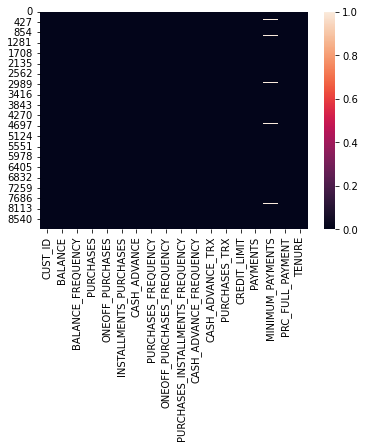

In [12]:
sns.heatmap(creditcard_df.isnull())

###### Contagem de Valores Nulos

In [13]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

###### Preencher os valores Nulos com a média dos atributos

In [14]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [15]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
        ..
8919   NaN
8929   NaN
8935   NaN
8944   NaN
8946   NaN
Name: MINIMUM_PAYMENTS, Length: 313, dtype: float64

In [16]:
####### Preencher os valores Nulos com a média dos atributos
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [17]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [18]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

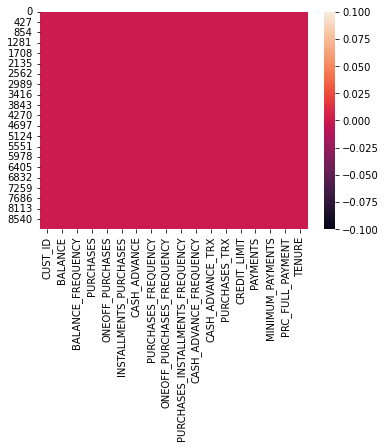

In [19]:
sns.heatmap(creditcard_df.isnull())

###### Verificando valores duplicados

In [20]:
creditcard_df.duplicated().sum()

0

###### Removendo atributos não relevantes para análise

In [21]:
creditcard_df.drop('CUST_ID', axis=1, inplace = True)

In [22]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Visualização e exploração dos dados

In [23]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [24]:
len(creditcard_df.columns)

17

###### Criando um Histograma para cada atributo e KDE  (Kernel Density Estimation)

C:\Users\Jack Danies\Documents\github\Projeto_Departamento_de_Marketing\virtual2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jack Danies\Documents\github\Projeto_Departamento_de_Marketing\virtual2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jack Danies\Documents\github\Projeto_Departamento_de_Marketing\virtual2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated functi

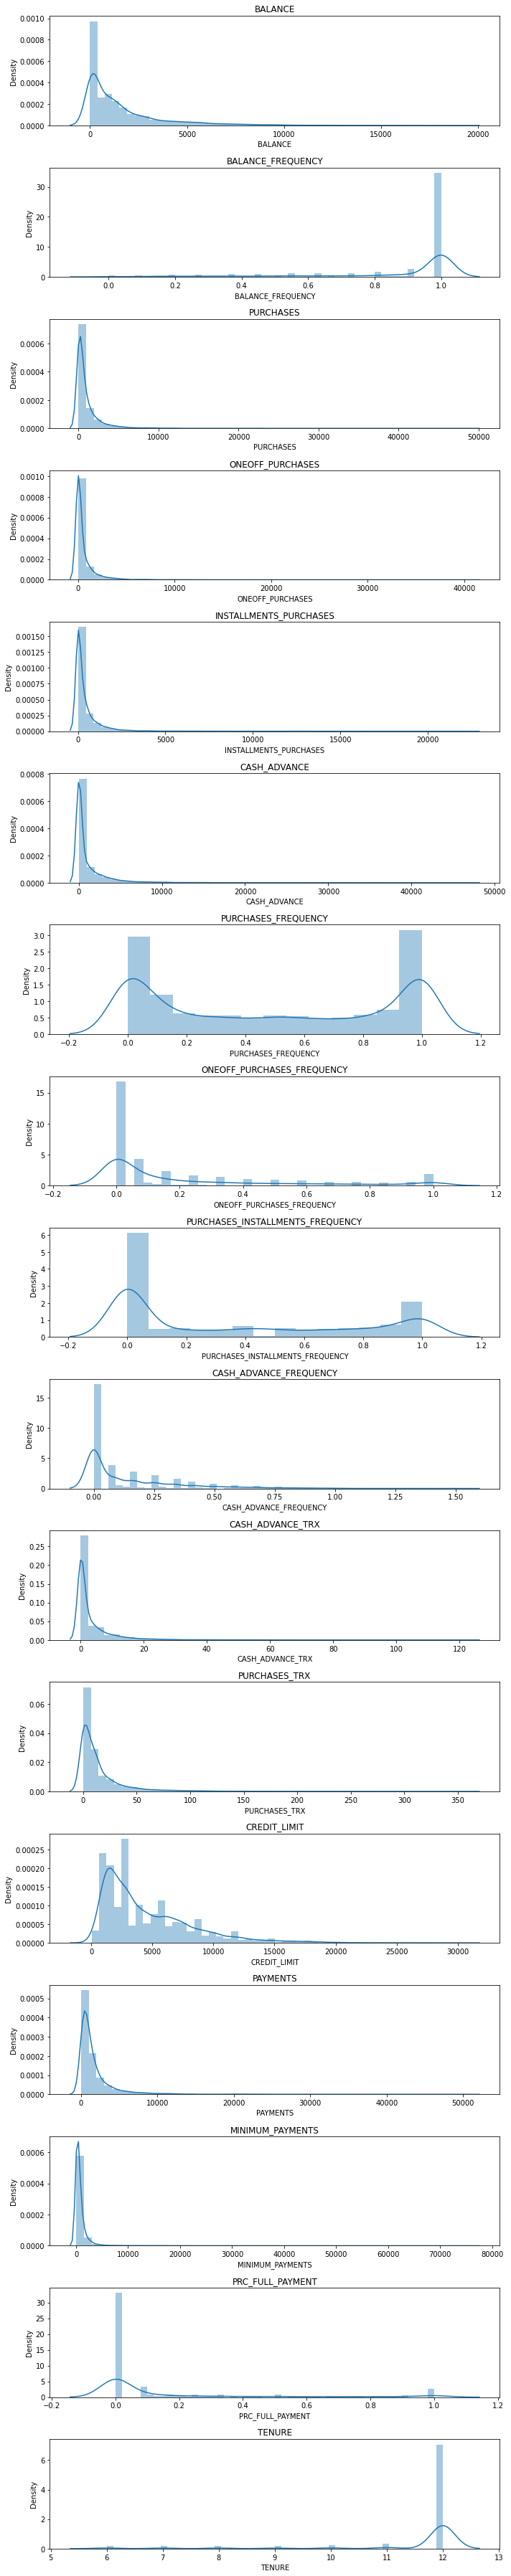

In [25]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True) # hist e KDE (Kernel Density Estimation)
  plt.title(creditcard_df.columns[i]) # título
plt.tight_layout();

# OBS: Pela "Frequência de Compras" (PURCHASES_FREQUENCY), é possível perceber os clientes que usam muito o cartão de crédito
# e os que não usam com frequência, o Banco pode analisar estes dados e mandar campanhas segmentadas para cada um desses grupos
# conforme o perfil Ex: incentivando uso do cartão para os que menos usam o cartão / aumentando a campanha com novos produtos







###### Matriz de Correlações  - Correlations -  Quanto um atributo está relacionado ao outro

In [26]:
correlations = creditcard_df.corr()

###### Mapa de Calor

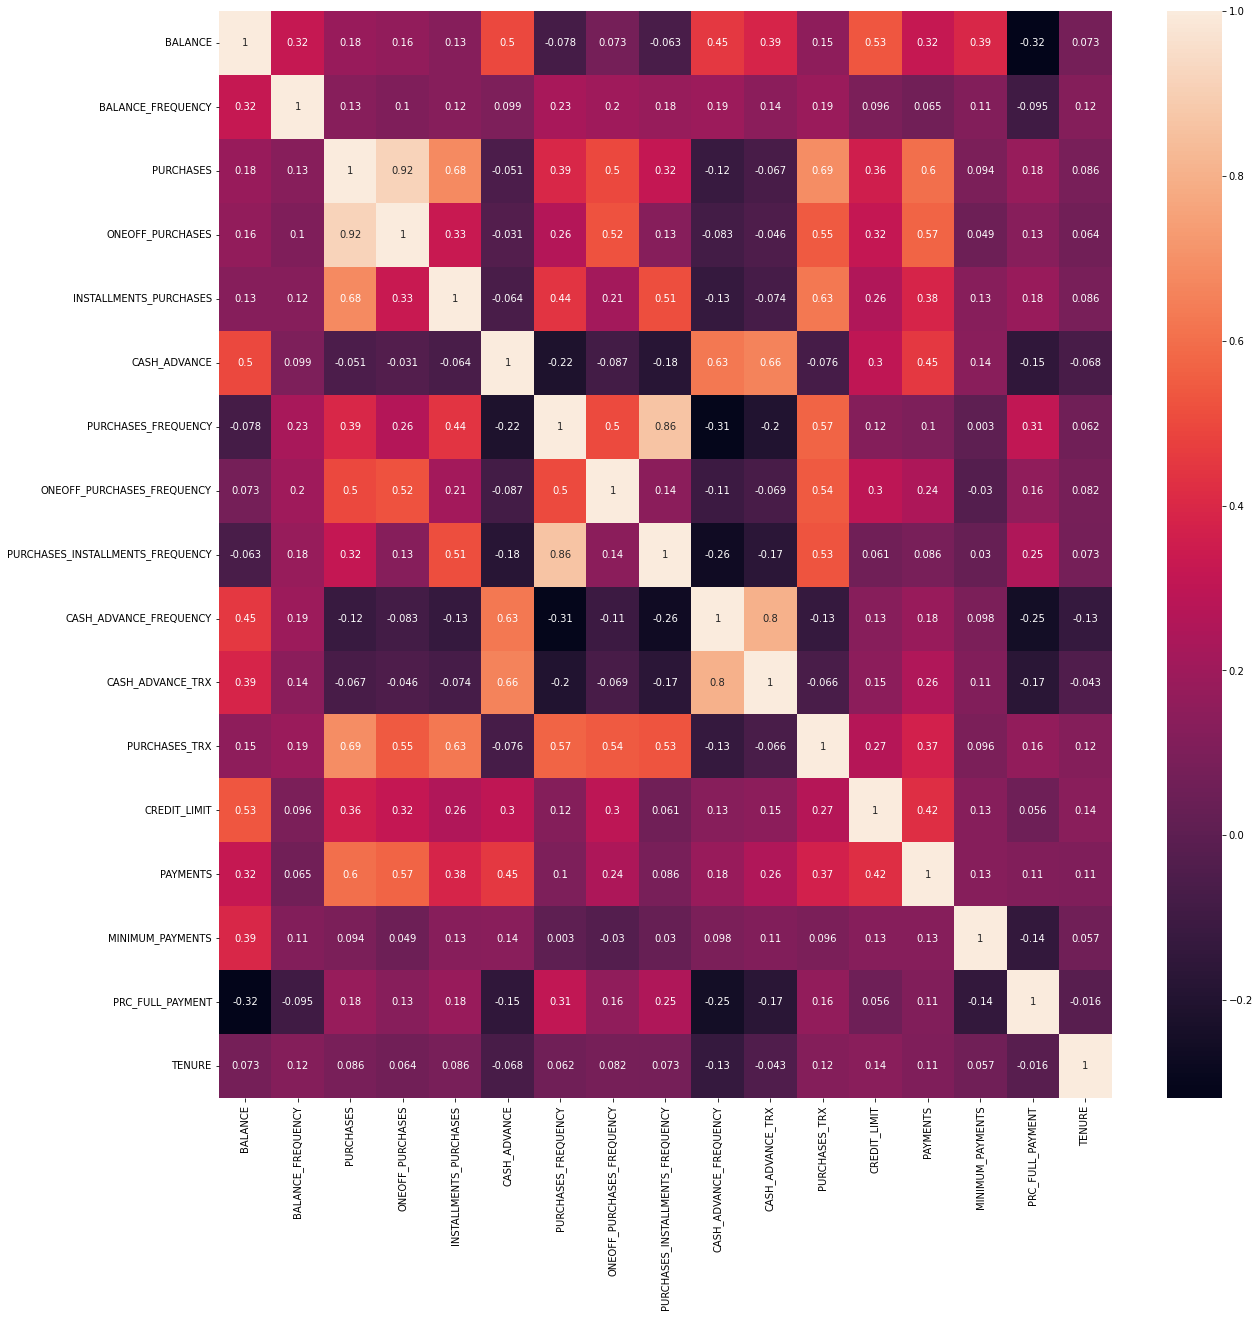

In [27]:
# Gerar um Mapa de Calor para visualizaar as correlações
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot= True); # annot True para visualizar os valores 
# OBS: valores entre -1 e 1, quanto mais próximos das extremidades, mais forte é a correlação entre os atributos

# constatação 1- Correlação forte - Frequência de Compras (PURCHASES_FREQUENCY) / Frequência de Compras Parceladas (PURCHASES_INSTALLMENTS_FREQUENCY)
# estão fortemente correlacionadas

# constatação 2-correlação forte - Valor Total Comprado (PURCHASES) / Compras A Vista (ONEOFF_PURCHASES)
# indica que a maior parte das compras são relacionadas a compras A Vista

# constatação 3- correlação fraca - Valor Total Comprado (PURCHASES) / Limite do cartão de crédito (CREDITLIMIT)
# pode ser um indicativo que o Limite de Crédito do cartão do cliente não tem influência tão grande no valor de compra

# constatação 4- correlação fraca Compras parceladas (INSTALLMENTS_PURCHASES) / Valor Total Comprado (PURCHASES)
# indica que os maiores valores de compras do cartão de crédito estão relacionadas a compras a Vista



## Definição do número de clusters usando o Elbow Method
###### https://en.wikipedia.org/wiki/Elbow_method_(clustering)
###### https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [28]:
# Verificando valor max e min da conta corrente (BALANCE)
# Existe uma grande diferença entre esses valores
# como será utilizado o algoritmo K-Means(que vai fazer calculo da distância euclidiana) 

# é necessário fazer o balanceamento/escalonamento (stadardisation - Padronização ou Normalização - ) dos atributos
# minmaxscaler - considera valores mínimos e valores máximos para colocar os valores no mesmo padrão
# standardscaler - utiliza a técnica Padronização que vem de estatística, ele vai utilizar a média e o desvio padrão 
#z = (x-u)/s -> x é o valor para fazer a transformação, menos a média (u) da base de dados dividio pelo desvio padrão (s)
# a técnica de padronização é muito utilizada quando a base de dados possui muitos OUTILIERS

min(creditcard_df['BALANCE']), max (creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [29]:
# fazendo a transformação nos dados 
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [30]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [31]:
# como o método scaler.fit_transform é do Numpy, necessário fazer pelo índice
min(creditcard_df_scaled[0]), max (creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [32]:
# Dados escalonados
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [33]:
#criar o algoritmo k-means, fazer o agrupamento, em seguida obter o valor de wcss
# Teste para determinar o WCSS , teste com 20 grupos(clusters), para determinar qual o WCSS ideal

# criando uma lista vazia
wcss_1 = []
# variável com range de 1 a 20
range_values = range(1,20)

for i in range_values: #percorrer essa variável
    kmeans = KMeans(n_clusters=i) # criar um objeto do k-means com o parâmetro número de cluster 
    kmeans.fit(creditcard_df_scaled) # gerando o grupo pelo método fit
    wcss_1.append (kmeans.inertia_)# acessar a variável wcss, adicionando o valor de wcss que está dentro do parâmetro inertia
    
    




In [34]:
print(wcss_1)

[152150.0000000002, 127785.04965248301, 111986.69806610126, 99074.0927111773, 91502.96447691797, 84851.13240432597, 79755.97153971368, 75103.9039113365, 70887.77051633707, 66981.43635907161, 63632.99938722892, 61380.666722982845, 59150.93637836145, 57571.335758361936, 55833.21307342191, 54268.44181998494, 53018.379418435885, 51867.817528924774, 50822.14105588182]


Text(0, 0.5, 'WCSS')

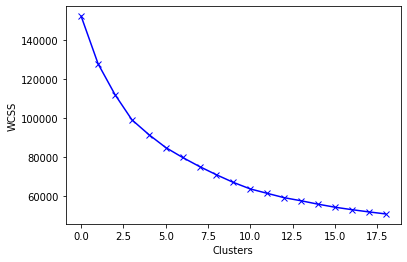

In [35]:
# Para tomarmos a decisão de qual o WCSS ideal , gerar gráfico
plt.plot(wcss_1, 'bx-') # bx para indicar os pontos
plt.xlabel('Clusters')
plt.ylabel('WCSS')
# em torno de 7 a 9 seria o número de clusters ideal

## K-means em segmentação de mercado 1


### Traçando o perfil dos clientes por meio de análise dos centróides

#### Agrupamento com k-means

In [36]:
# utilizar o número de clusters que encontramo e fazer o agrupamento
# recriar a variável k-means que fara o agrupamento
kmeans = KMeans(n_clusters=8) # testando com 8 clusters

# treinamento do algoritmo kmeans, encontrar os centródes , recálcular as médias, até que consiga enquandrar em um dos 8 clusters 
kmeans.fit(creditcard_df_scaled) 

# criando variável labels para receber 
labels = kmeans.labels_ 


In [37]:
# vizualiando a que grupo cada cliente pertence
labels, len(labels)

(array([1, 3, 0, ..., 7, 7, 7]), 8950)

In [38]:
# Checando a quantidade de clientes por grupo 
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1104, 2718, 1181,  859,   30,  420, 2016,  622], dtype=int64))

In [63]:
# visualizando o centróids
# visualizando os atributo médios de cada um dos clusters. Ex: média do saldo na conta corrente , média das compras a vista e etc.

kmeans.cluster_centers_

array([[-7.01253042e-01, -2.14155973e+00, -3.11047076e-01,
        -2.35564512e-01, -3.02577536e-01, -3.22149896e-01,
        -5.55955163e-01, -4.43020853e-01, -4.40182510e-01,
        -5.21105180e-01, -3.76271667e-01, -4.19604494e-01,
        -1.77998391e-01, -2.02448675e-01, -2.56774496e-01,
         2.80447805e-01,  1.99472690e-01],
       [ 1.92305052e+00,  3.37716867e-01,  1.12120418e+01,
         1.06003671e+01,  7.03311838e+00,  4.19625127e-01,
         1.04698328e+00,  1.91550149e+00,  9.81333653e-01,
        -2.58911831e-01,  6.12285458e-02,  5.36243850e+00,
         3.04406408e+00,  8.09897492e+00,  1.12031761e+00,
         1.11013157e+00,  3.10863465e-01],
       [ 1.69701713e+00,  3.92762128e-01, -2.16883384e-01,
        -1.55458873e-01, -2.27280008e-01,  2.03083917e+00,
        -4.75027394e-01, -2.11362151e-01, -4.12620898e-01,
         1.92960664e+00,  1.94792118e+00, -2.65397075e-01,
         1.03778704e+00,  8.28099037e-01,  5.15820026e-01,
        -3.92019940e-01,  6.8

In [39]:
# criar um dataframe com os dados nd fase anterior para fazer uma análise
# como temos a mesma quantidade regitros para centróides e também para colunas do dataframe, podemos passar estes 2 parâmetros
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns]   )
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.162601,0.392179,0.464655,0.606993,-0.016632,-0.332621,0.942818,1.878030,0.090361,-0.406452,-0.322632,0.529433,0.384113,0.094331,-0.162193,0.406784,0.261183
1,0.020351,0.404043,-0.362377,-0.247501,-0.402018,-0.086140,-0.869110,-0.411369,-0.760041,0.115907,-0.020450,-0.487562,-0.305510,-0.247916,-0.003229,-0.456436,0.272429
2,-0.701253,-2.141560,-0.311047,-0.235565,-0.302578,-0.322150,-0.555955,-0.443021,-0.440183,-0.521105,-0.376272,-0.419604,-0.177998,-0.202449,-0.256774,0.280448,0.199473
3,1.697017,0.392762,-0.216883,-0.155459,-0.227280,2.030839,-0.475027,-0.211362,-0.412621,1.929607,1.947921,-0.265397,1.037787,0.828099,0.515820,-0.392020,0.068925
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,0.922183,0.467535,2.256660,1.722274,2.171760,-0.195314,1.160307,1.552162,1.245501,-0.313553,-0.211258,2.785144,1.225536,1.285330,0.567968,0.290267,0.333992
6,-0.366541,0.333613,-0.038954,-0.244358,0.356637,-0.363772,0.988918,-0.386940,1.204105,-0.475444,-0.361371,0.186089,-0.261402,-0.218295,-0.046278,0.313708,0.257637
7,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733


#### PROCESSO INVERSO DA PADRONIZAÇÃO - Para obter os dados reais para verificar o que aconteceu em cada um dos clusters

In [40]:
# Como foi feita a padronização, os valores estão baixos e fica ruim para visualização
# Para obter de fato os dados Reais, Necessario fazer o processo reverso da padronização 

# recriando a variável cluster_centers, chamando o objeto scaler que foi o objeto utilizado para aplicar a padronização(inverse)
cluster_centers = scaler.inverse_transform(cluster_centers) 

# novamente recriar o cluster_center no formato de dataframe 
cluster_centers = pd.DataFrame(data = cluster_centers, columns= [creditcard_df.columns])
                               



In [41]:
# visualizar os valores médios de cada cluster
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1226.034069,0.970174,1995.948062,1599.920616,396.027446,281.348606,0.868749,0.762711,0.400349,0.053809,1.047101,27.869565,5892.008399,2006.223157,486.222262,0.272692,11.866848
1,1606.833938,0.972985,228.981762,181.636531,47.527307,798.230633,0.141535,0.079738,0.062378,0.158338,3.109272,2.590876,3382.879568,1015.452769,856.682039,0.020215,11.881898
2,104.875814,0.369955,338.647961,201.448528,137.450533,303.307732,0.267219,0.070296,0.189498,0.030866,0.681049,4.280034,3846.818481,1147.074774,265.804410,0.235741,11.784264
3,5096.672741,0.970312,539.830140,334.407483,205.541154,5237.635714,0.299699,0.139404,0.200451,0.521278,16.541958,8.113054,8270.343293,4130.409426,2066.303355,0.039056,11.609557
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,3483.920087,0.988026,5824.593571,3451.058643,2374.963500,569.288263,0.956038,0.665498,0.859431,0.072399,1.807143,83.938095,8953.452381,5454.047925,2187.831486,0.238613,11.964286
6,801.549796,0.956301,919.979435,186.852698,733.569831,216.024183,0.887251,0.087026,0.842980,0.040003,0.782738,19.335317,3543.363195,1101.201232,756.357081,0.245469,11.862103
7,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904


### Conclusões sobre algum dos grupos, para de fato fazer uma análise e fazer a segmentação destes clientes

- Grupo 1 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras - pode enviar uma campanha de marketing incentivando o consumo de produtos

- Grupo 0: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 2: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 6 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

## K-means em segmentação de mercado 2

In [42]:
labels, len(labels)

(array([1, 3, 0, ..., 7, 7, 7]), 8950)

In [45]:
# Adicionar cada um dos grupos para cada um dos registros(clientes)
# Novo dataframe para fazer a operação inversa
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)


In [46]:
# Visualizando a qual cluster cada clientes pertence
# Com isso e possível passar para o Departamento de Marketing, a lista de cada um dos clientes e seu respectivo cluster

# Obs: Num cenário real para entrega ao DPM não teríamos toda os atributos, apenas o contatos (nome, email, celular...)
# para que seká para que possar ser criada campanhas de acordo com o perfil de cada grupo (cluster)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


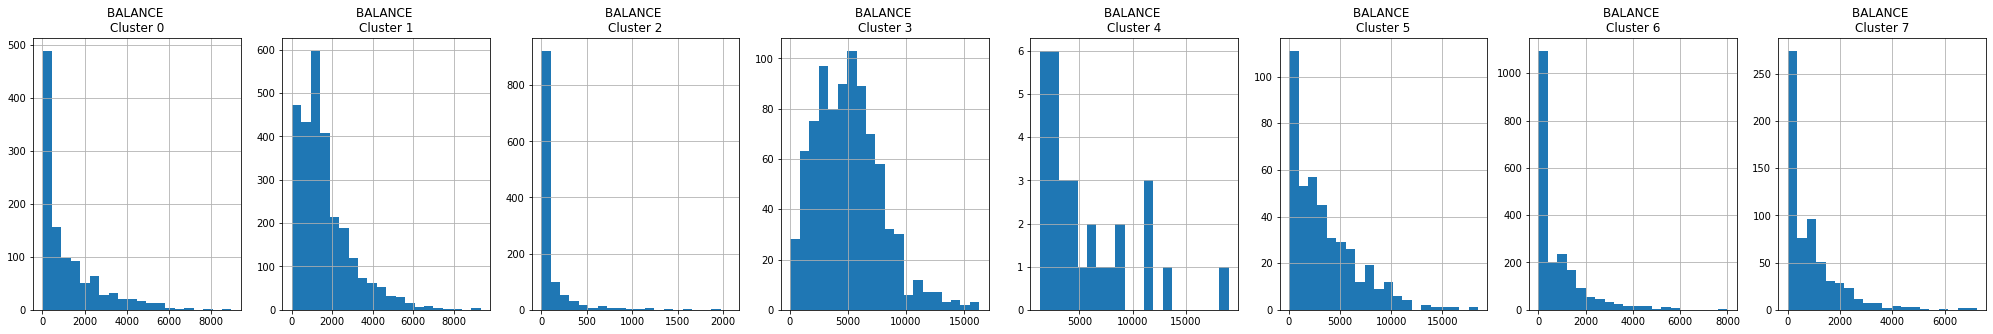

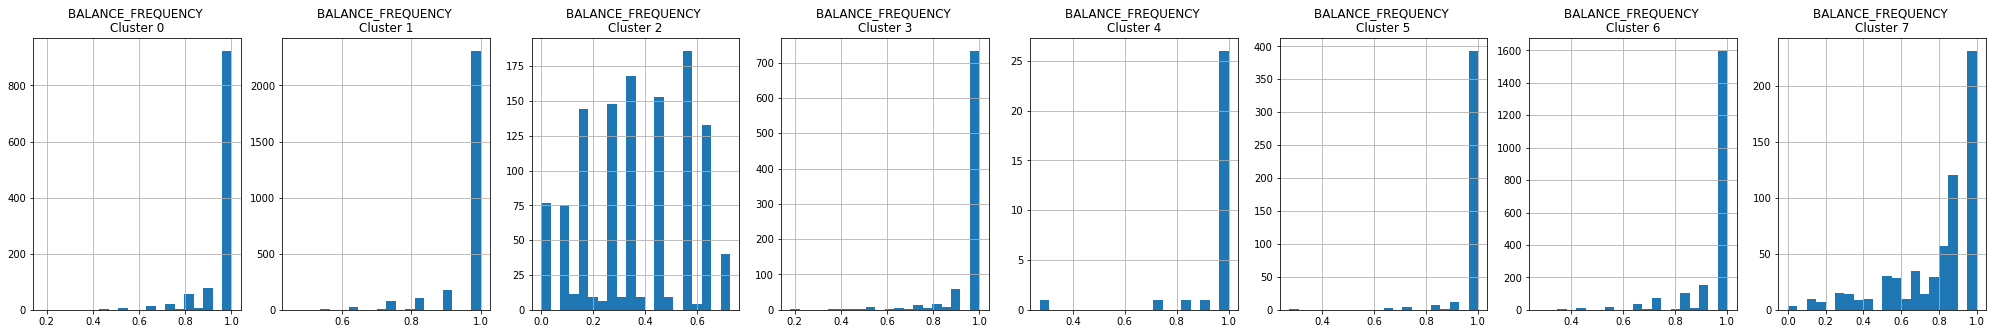

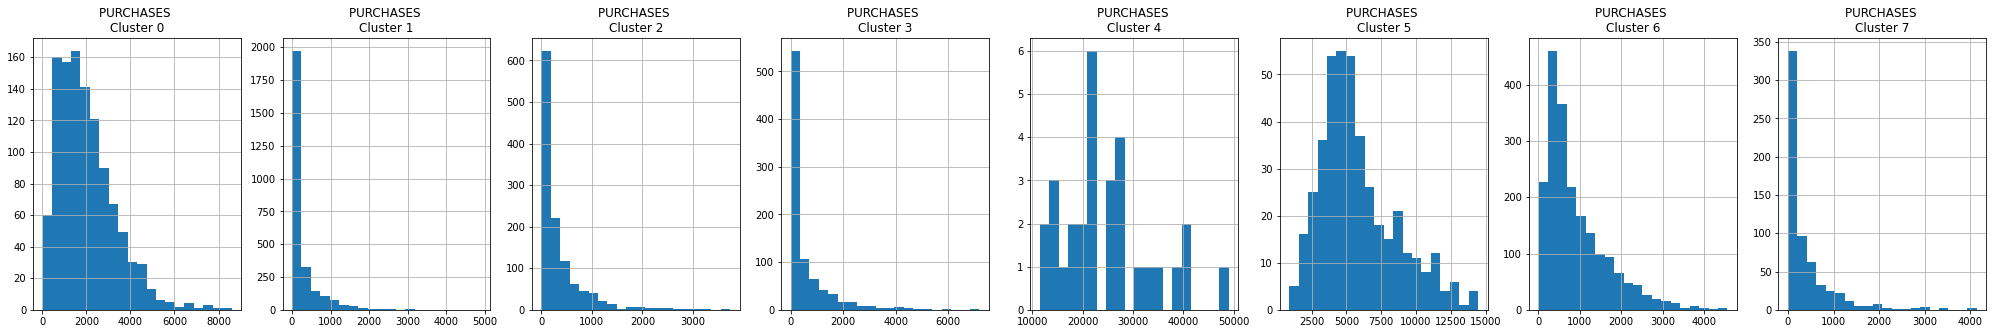

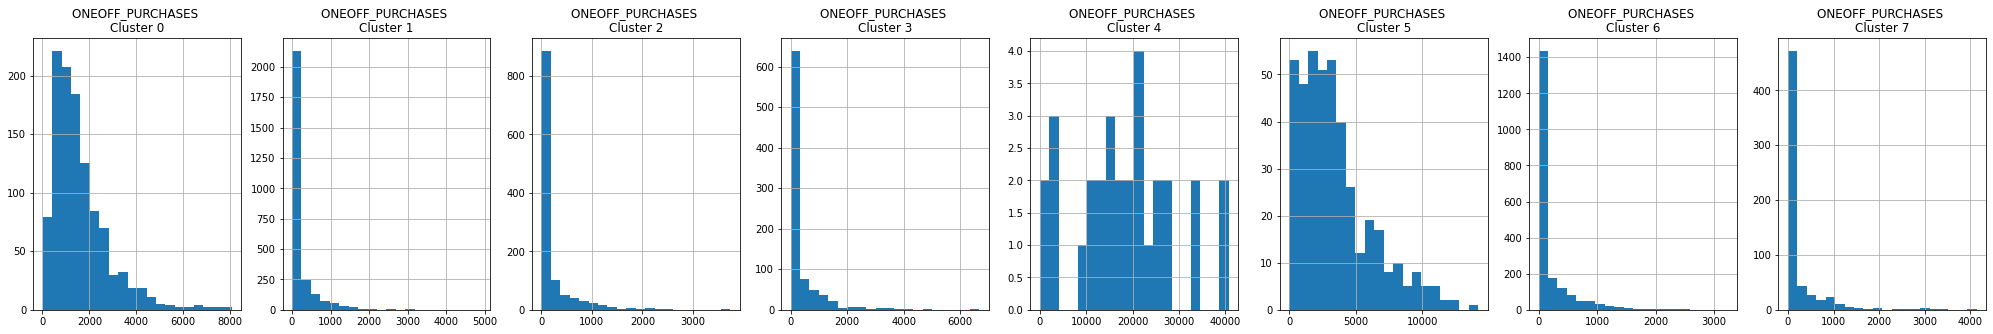

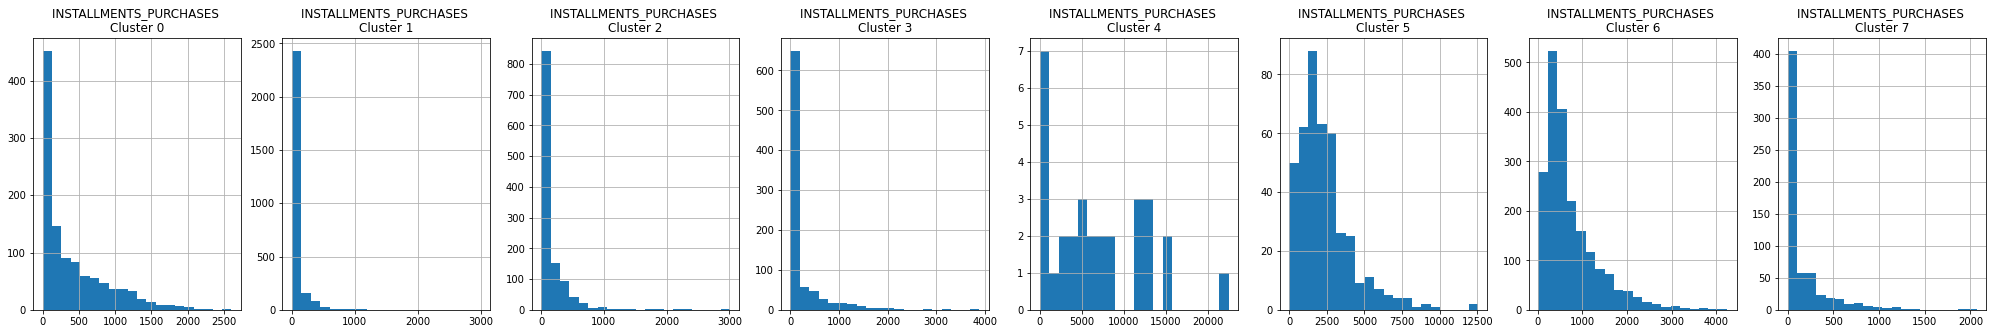

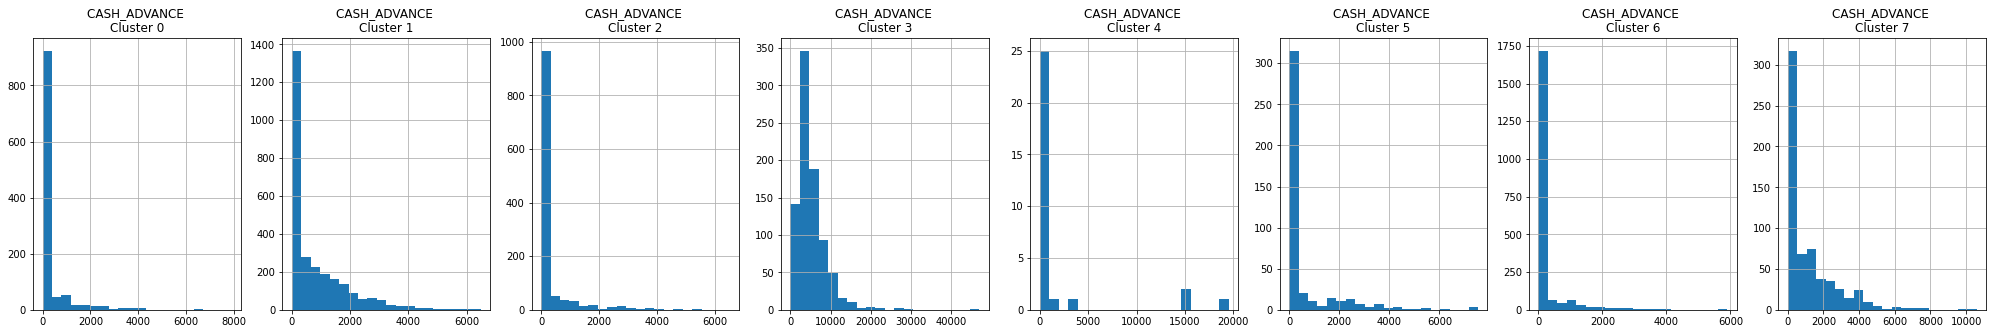

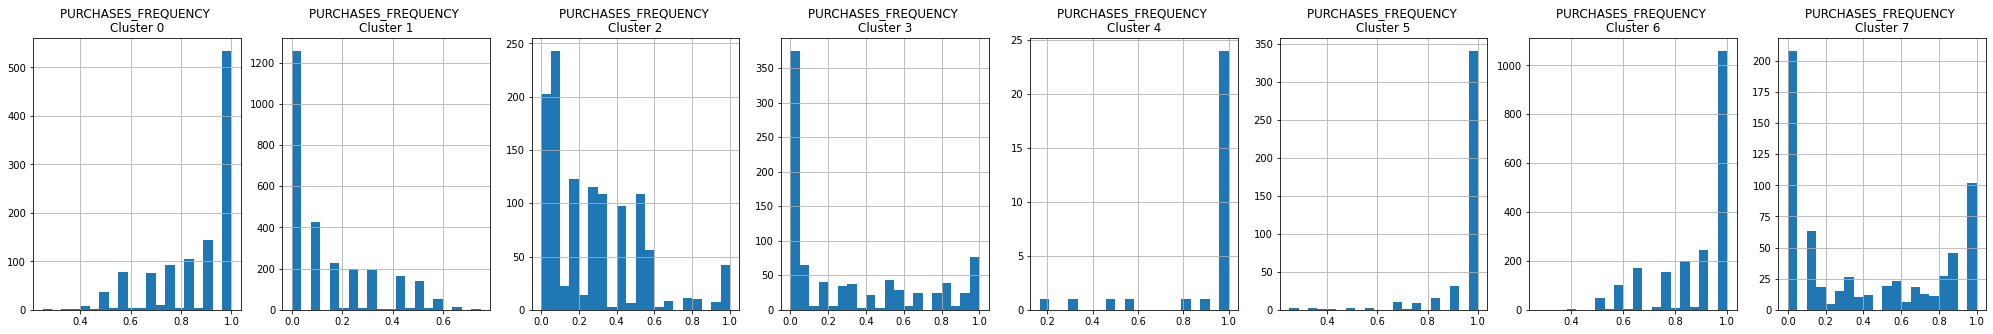

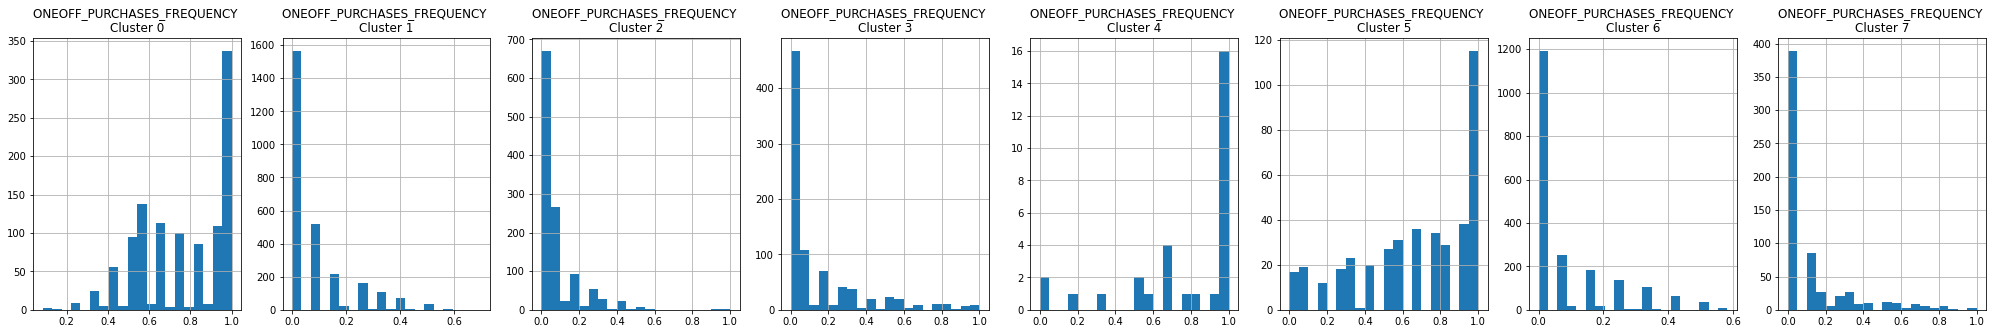

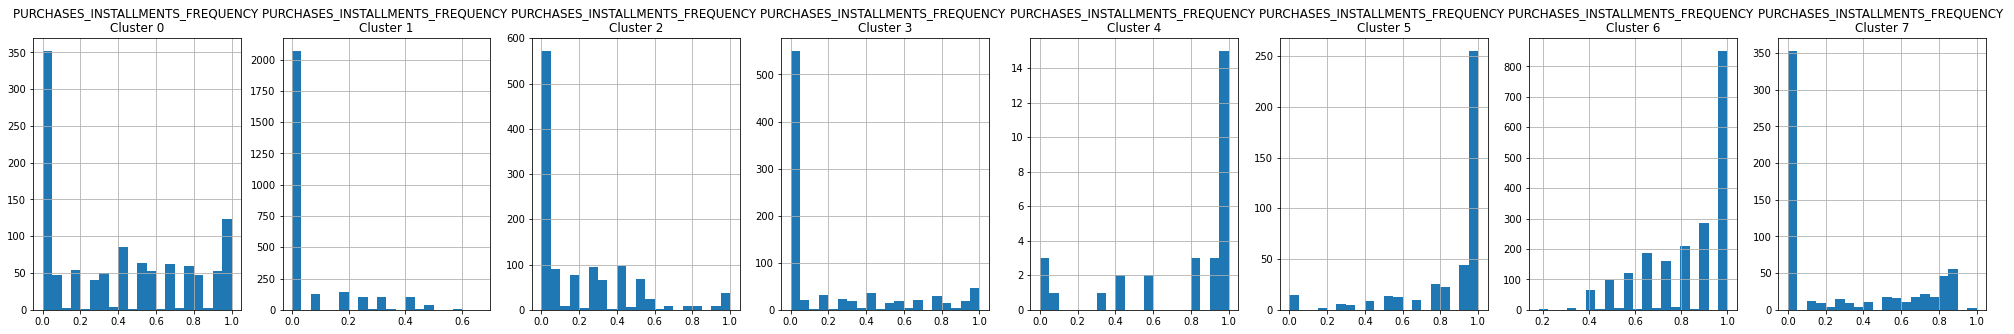

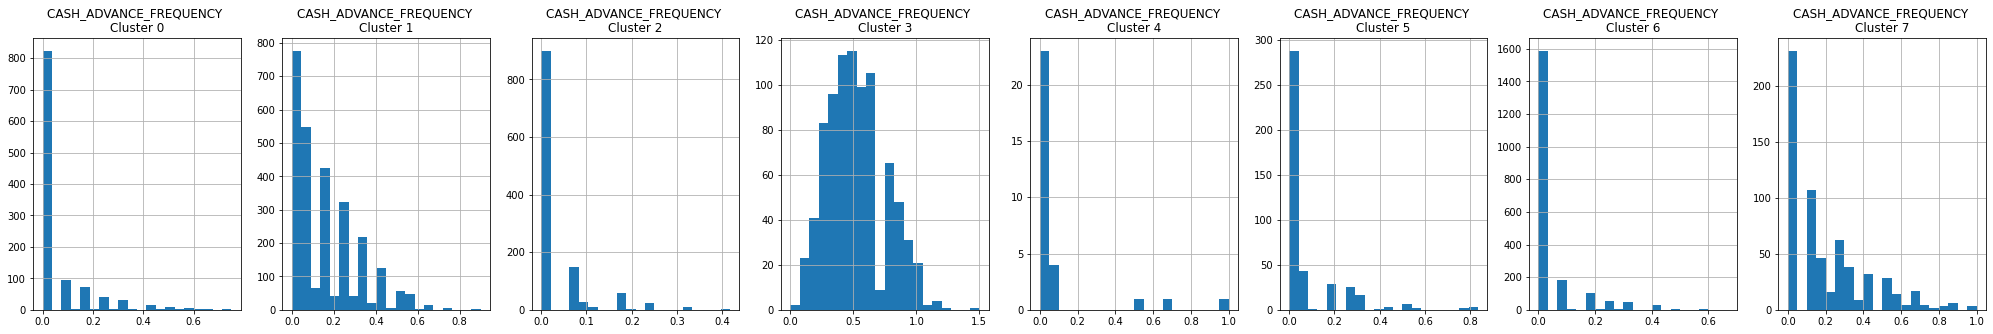

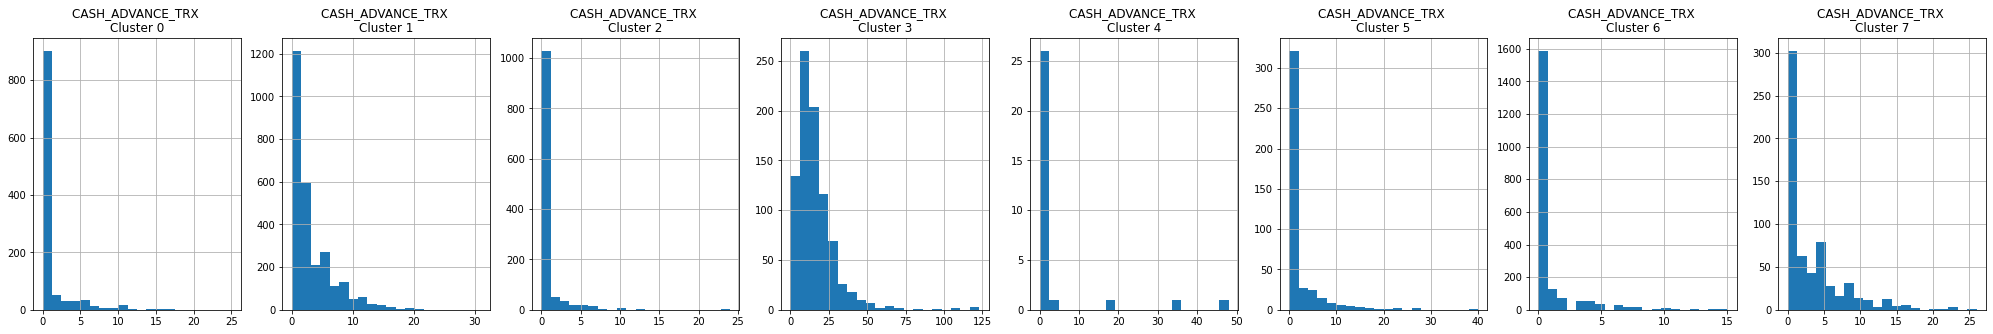

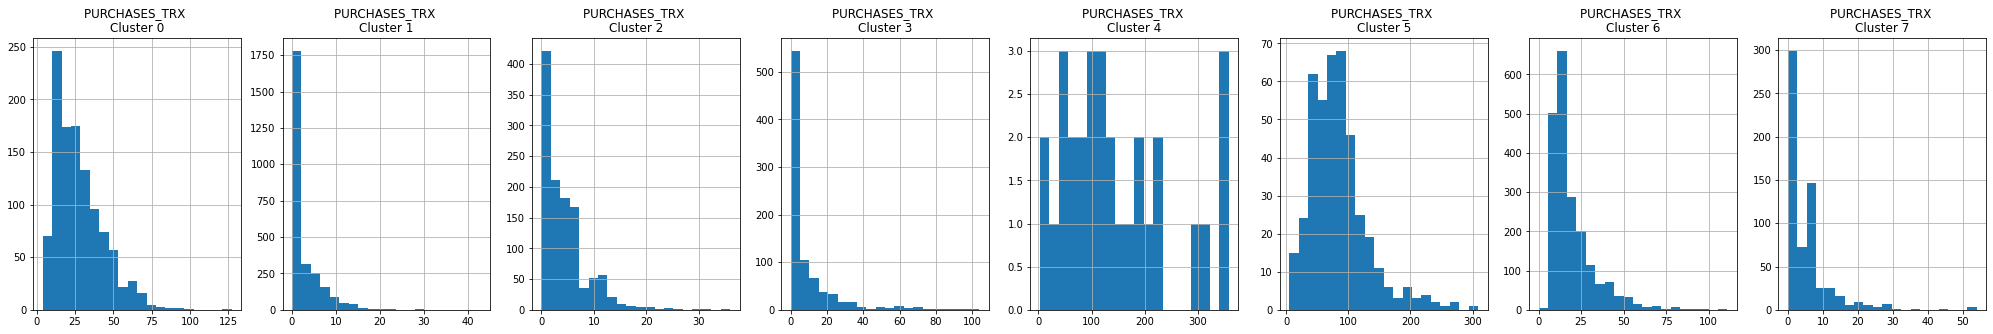

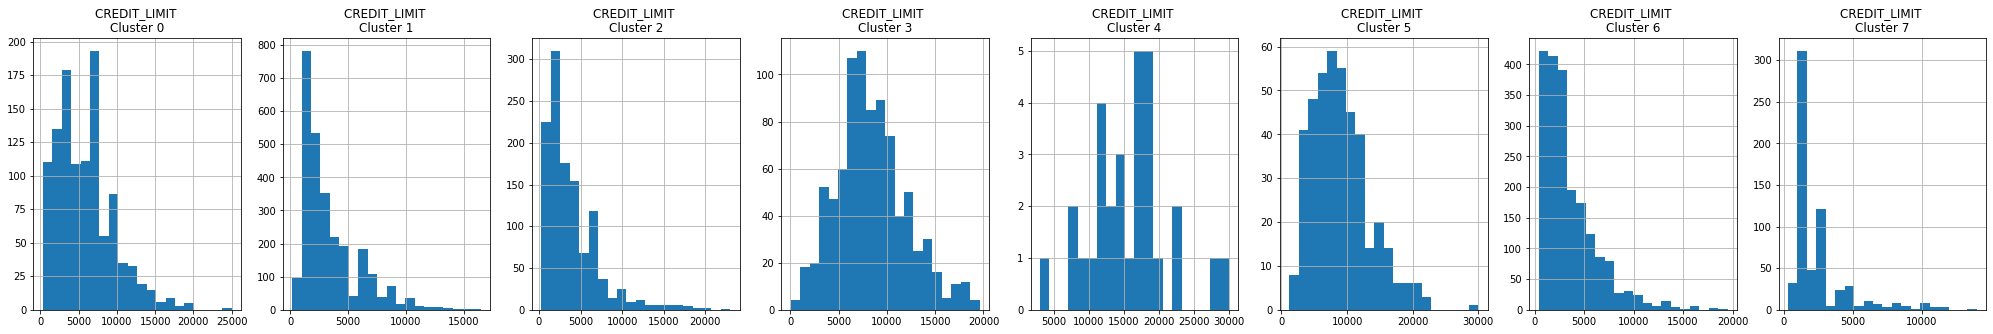

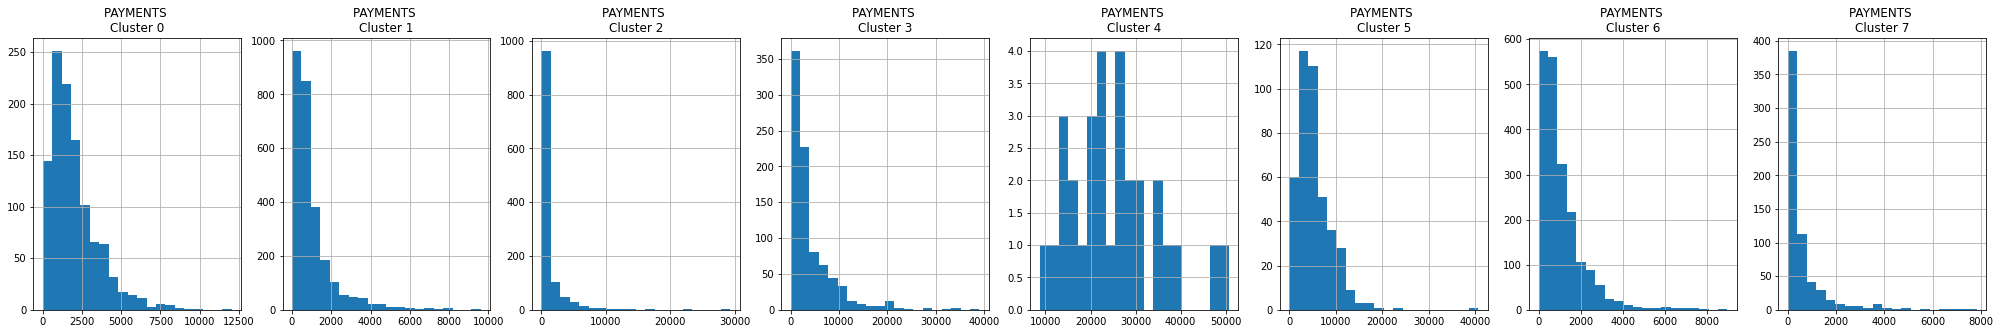

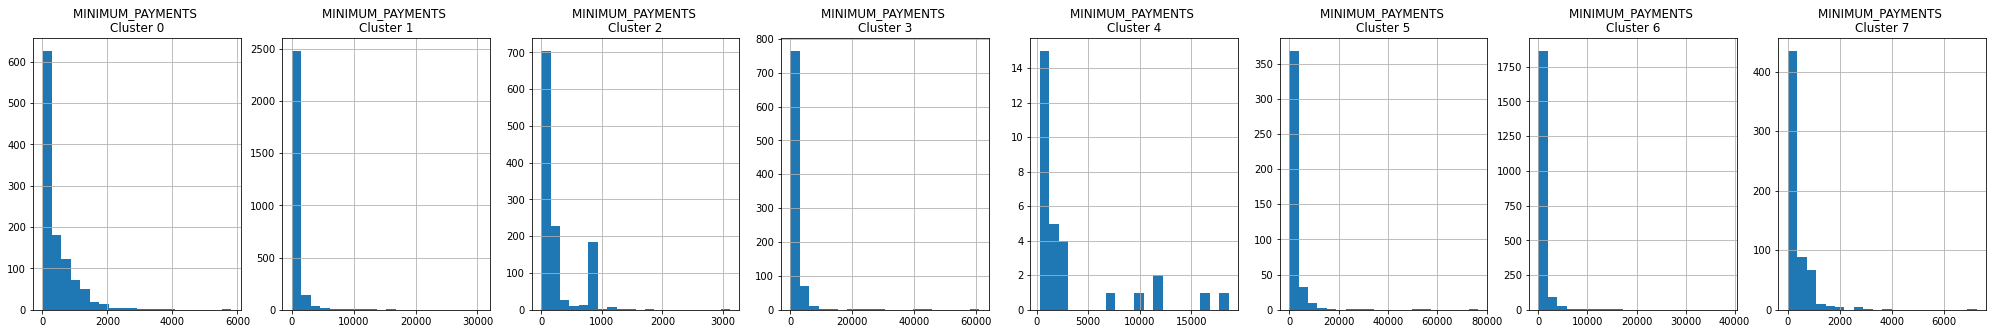

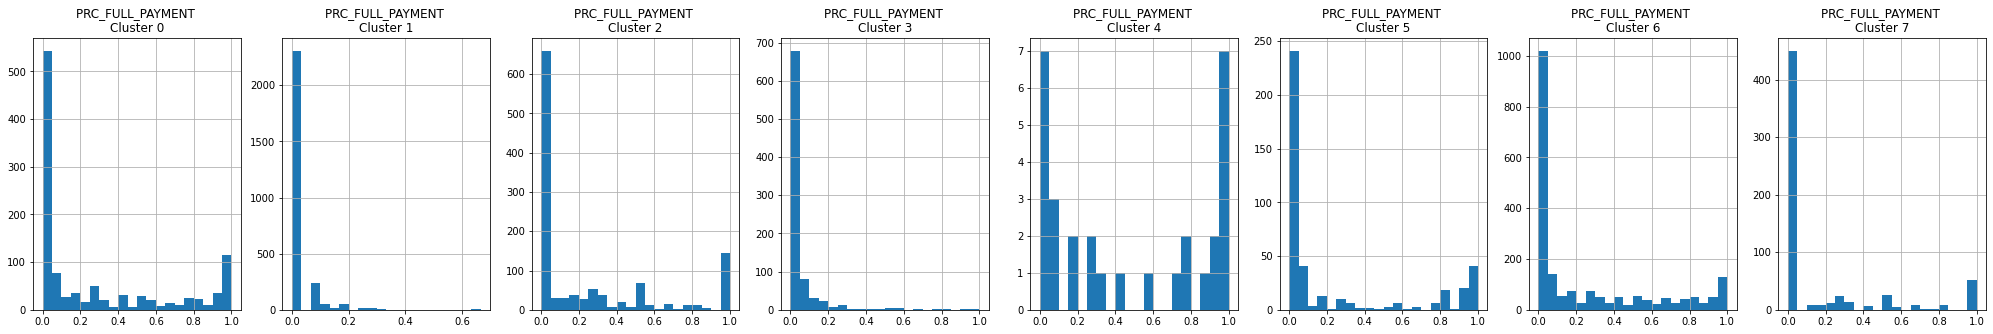

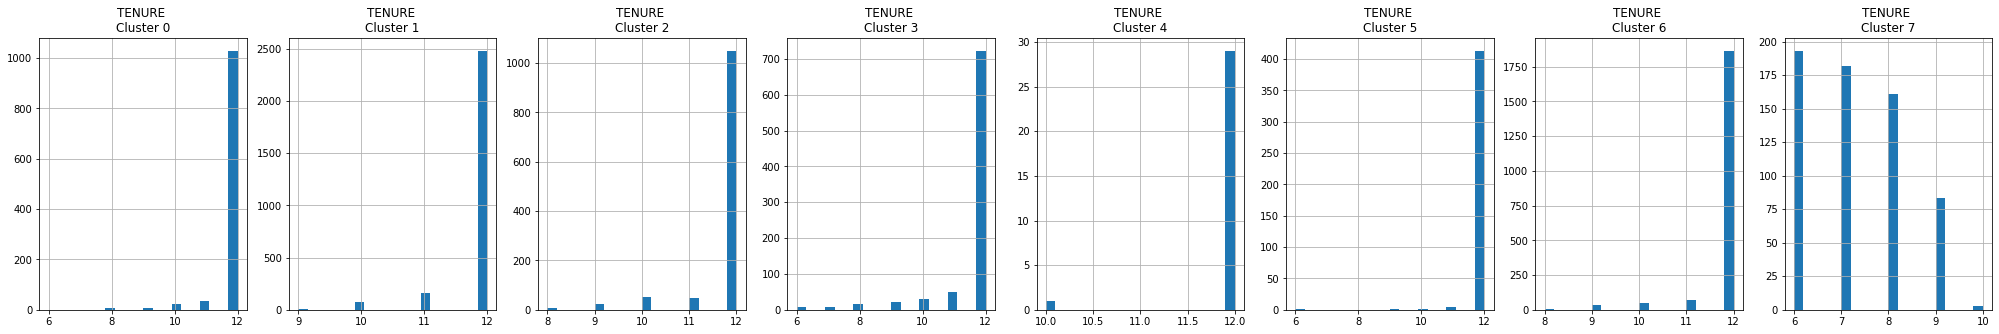

In [51]:
## Histogramas utilizando os Grupos para análise em relação aos grupos que foram gerados
for i in creditcard_df.columns: # percorrer coluna por coluna
    plt.figure(figsize = (35,5))
    for j in range(8):  # percorrer cluster por cluster
        plt.subplot(1,8, j + 1) # um subgráfico com 1 linha e 8 colunas / j+1 id do gráfico 
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j] # registros de 0 a 7
       # gerar o histograma
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i,j)) ## Criando um título
        
    plt.show()

### Codificação simulando entrega ao Departamento de Marketing

In [54]:
# ordenando por clusters
creditcard_ordered = creditcard_df_cluster.sort_values(by = 'cluster') 
creditcard_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4998,6537.852206,0.909091,2598.51,2422.55,175.96,0.0,0.272727,0.090909,0.272727,0.0,0,26,16000.0,2209.410409,1385.561503,0.000000,11,0
3969,179.209557,1.000000,1526.42,1526.42,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,26,13500.0,1482.286465,190.938401,0.916667,12,0
5619,672.847330,1.000000,1969.47,1796.79,172.68,0.0,0.500000,0.400000,0.100000,0.0,0,7,5500.0,1204.587035,238.195134,0.100000,10,0
2369,2092.855291,1.000000,1624.05,1205.75,418.30,0.0,0.500000,0.250000,0.333333,0.0,0,13,8500.0,3794.796448,559.169569,0.083333,12,0
1448,1.198223,0.909091,317.02,149.97,167.05,0.0,0.916667,0.750000,0.666667,0.0,0,30,6000.0,304.637365,28.518250,0.000000,12,0


In [56]:
creditcard_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4134,22.151355,0.333333,134.87,64.98,69.89,0.000000,0.333333,0.166667,0.166667,0.000000,0,3,3000.0,41.580849,81.595815,0.000000,6,7
8307,1299.027426,1.000000,731.45,74.23,657.22,2823.614133,1.000000,0.142857,0.857143,0.571429,16,11,1500.0,2296.979965,1066.288428,0.166667,7,7
6208,2336.510738,1.000000,666.64,0.00,666.64,3230.625760,0.571429,0.000000,0.428571,0.428571,3,4,7000.0,822.387829,287.636364,0.000000,7,7
4158,1089.696979,0.833333,349.04,0.00,349.04,1477.683660,0.666667,0.000000,0.500000,0.333333,4,7,1500.0,231.019657,851.119550,0.000000,6,7
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,7


In [57]:
### de DataFrame passar para arquivo csv
creditcard_ordered.to_csv('cluster.csv')